In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import keras
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


#https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/

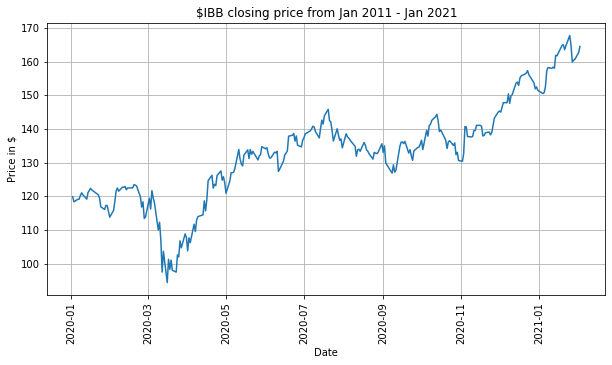

In [51]:

data = pd.read_csv('IBBmonth.csv', usecols=[0,4], parse_dates=['Date'], header=0, squeeze=True)
plt.figure(figsize=[10, 5])
plt.plot(data['Date'], data['Close'])
plt.title('$IBB closing price from Jan 2011 - Jan 2021')
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [53]:
#Split test and train dataset


train_data, test_data = train_test_split(data, test_size=0.33, shuffle = False, stratify = None)


print(train_data.head())
print(train_data.tail())
print(test_data.head())
print(train_data)

test_data = test_data.reset_index(drop=True)
train_data = test_data.reset_index(drop=True)

        Date       Close
0 2020-01-02  119.889999
1 2020-01-03  118.360001
2 2020-01-06  119.120003
3 2020-01-07  119.150002
4 2020-01-08  120.220001
          Date       Close
178 2020-09-16  136.160004
179 2020-09-17  135.630005
180 2020-09-18  136.320007
181 2020-09-21  132.830002
182 2020-09-22  133.839996
          Date       Close
183 2020-09-23  132.080002
184 2020-09-24  130.690002
185 2020-09-25  133.470001
186 2020-09-28  134.479996
187 2020-09-29  134.610001
          Date       Close
0   2020-01-02  119.889999
1   2020-01-03  118.360001
2   2020-01-06  119.120003
3   2020-01-07  119.150002
4   2020-01-08  120.220001
..         ...         ...
178 2020-09-16  136.160004
179 2020-09-17  135.630005
180 2020-09-18  136.320007
181 2020-09-21  132.830002
182 2020-09-22  133.839996

[183 rows x 2 columns]
(90, 2)


In [54]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [61]:
# define input sequence
raw_seq = train_data['Close']
print(raw_seq)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

print(X,y)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

# fit model
model.fit(X, y, epochs=2000, verbose=1)
# demonstrate prediction

temp = test_data['Close']
x_input, y_output = split_sequence(temp, n_steps)
#x_input = x_input[]
#x_input = x_input.values.reshape(n_steps, (n_steps:len(x_input)))


yhat = model.predict(x_input, verbose=1)

print(yhat)


#predictions = pd.DataFrame.from_records(yhat, columns='predicted')
#predictions = predictions.reset_index(drop=True)


#actual = data[n_steps:len(data)]
#actual = actual.reset_index(drop=True)




0     132.080002
1     130.690002
2     133.470001
3     134.479996
4     134.610001
         ...    
85    164.830002
86    159.850006
87    160.410004
88    160.639999
89    162.690002
Name: Close, Length: 90, dtype: float64
[[132.080002 130.690002 133.470001]
 [130.690002 133.470001 134.479996]
 [133.470001 134.479996 134.610001]
 [134.479996 134.610001 135.410004]
 [134.610001 135.410004 136.669998]
 [135.410004 136.669998 133.869995]
 [136.669998 133.869995 139.570007]
 [133.869995 139.570007 137.880005]
 [139.570007 137.880005 140.990005]
 [137.880005 140.990005 141.380005]
 [140.990005 141.380005 142.529999]
 [141.380005 142.529999 143.649994]
 [142.529999 143.649994 144.339996]
 [143.649994 144.339996 142.449997]
 [144.339996 142.449997 139.210007]
 [142.449997 139.210007 139.710007]
 [139.210007 139.710007 137.429993]
 [139.710007 137.429993 136.529999]
 [137.429993 136.529999 134.190002]
 [136.529999 134.190002 136.149994]
 [134.190002 136.149994 136.490005]
 [136.149994 136.

3/3 [==============================] - 0s 334us/step - loss: 7.7533
Epoch 34/2000
3/3 [==============================] - 0s 334us/step - loss: 7.5881
Epoch 35/2000
3/3 [==============================] - 0s 334us/step - loss: 8.0065
Epoch 36/2000
3/3 [==============================] - 0s 334us/step - loss: 7.8202
Epoch 37/2000
3/3 [==============================] - 0s 334us/step - loss: 7.7031
Epoch 38/2000
3/3 [==============================] - 0s 334us/step - loss: 7.7110
Epoch 39/2000
3/3 [==============================] - 0s 667us/step - loss: 7.7397
Epoch 40/2000
3/3 [==============================] - 0s 333us/step - loss: 7.5905
Epoch 41/2000
3/3 [==============================] - 0s 334us/step - loss: 7.6832
Epoch 42/2000
3/3 [==============================] - 0s 334us/step - loss: 7.6372
Epoch 43/2000
3/3 [==============================] - 0s 333us/step - loss: 7.6502
Epoch 44/2000
3/3 [==============================] - 0s 333us/step - loss: 7.6207
Epoch 45/2000
3/3 [===========

3/3 [==============================] - 0s 334us/step - loss: 7.4938
Epoch 133/2000
3/3 [==============================] - 0s 334us/step - loss: 7.5050
Epoch 134/2000
3/3 [==============================] - 0s 334us/step - loss: 7.6479
Epoch 135/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4141
Epoch 136/2000
3/3 [==============================] - 0s 333us/step - loss: 7.4243
Epoch 137/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4470
Epoch 138/2000
3/3 [==============================] - 0s 333us/step - loss: 7.4021
Epoch 139/2000
3/3 [==============================] - 0s 333us/step - loss: 7.4411
Epoch 140/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4937
Epoch 141/2000
3/3 [==============================] - 0s 333us/step - loss: 7.4158
Epoch 142/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4270
Epoch 143/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4027
Epoch 144/2000
3/3 

3/3 [==============================] - 0s 667us/step - loss: 7.3401
Epoch 231/2000
3/3 [==============================] - 0s 667us/step - loss: 7.4724
Epoch 232/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2829
Epoch 233/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4204
Epoch 234/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4545
Epoch 235/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2844
Epoch 236/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2973
Epoch 237/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2147
Epoch 238/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2513
Epoch 239/2000
3/3 [==============================] - 0s 334us/step - loss: 7.4668
Epoch 240/2000
3/3 [==============================] - 0s 334us/step - loss: 7.8857
Epoch 241/2000
3/3 [==============================] - 0s 668us/step - loss: 7.2965
Epoch 242/2000
3/3 

3/3 [==============================] - 0s 667us/step - loss: 7.0954
Epoch 329/2000
3/3 [==============================] - 0s 333us/step - loss: 7.0236
Epoch 330/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0076
Epoch 331/2000
3/3 [==============================] - 0s 333us/step - loss: 7.0617
Epoch 332/2000
3/3 [==============================] - 0s 333us/step - loss: 7.0546
Epoch 333/2000
3/3 [==============================] - 0s 333us/step - loss: 7.0390
Epoch 334/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0034
Epoch 335/2000
3/3 [==============================] - 0s 334us/step - loss: 7.1555
Epoch 336/2000
3/3 [==============================] - 0s 667us/step - loss: 7.1256
Epoch 337/2000
3/3 [==============================] - 0s 334us/step - loss: 6.9917
Epoch 338/2000
3/3 [==============================] - 0s 334us/step - loss: 7.1256
Epoch 339/2000
3/3 [==============================] - 0s 333us/step - loss: 7.2933
Epoch 340/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 7.0464
Epoch 427/2000
3/3 [==============================] - 0s 334us/step - loss: 6.7840
Epoch 428/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0087
Epoch 429/2000
3/3 [==============================] - 0s 333us/step - loss: 6.6984
Epoch 430/2000
3/3 [==============================] - 0s 333us/step - loss: 6.7702
Epoch 431/2000
3/3 [==============================] - 0s 667us/step - loss: 6.5961
Epoch 432/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0990
Epoch 433/2000
3/3 [==============================] - 0s 667us/step - loss: 6.6583
Epoch 434/2000
3/3 [==============================] - 0s 333us/step - loss: 7.1107
Epoch 435/2000
3/3 [==============================] - 0s 333us/step - loss: 7.2414
Epoch 436/2000
3/3 [==============================] - 0s 334us/step - loss: 7.3152
Epoch 437/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2251
Epoch 438/2000
3/3 

3/3 [==============================] - 0s 334us/step - loss: 6.1286
Epoch 525/2000
3/3 [==============================] - 0s 334us/step - loss: 6.8605
Epoch 526/2000
3/3 [==============================] - 0s 333us/step - loss: 7.6702
Epoch 527/2000
3/3 [==============================] - 0s 334us/step - loss: 6.9674
Epoch 528/2000
3/3 [==============================] - 0s 333us/step - loss: 6.8363
Epoch 529/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0776
Epoch 530/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6836
Epoch 531/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6707
Epoch 532/2000
3/3 [==============================] - 0s 333us/step - loss: 6.2699
Epoch 533/2000
3/3 [==============================] - 0s 334us/step - loss: 6.4461
Epoch 534/2000
3/3 [==============================] - 0s 334us/step - loss: 6.1873
Epoch 535/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6933
Epoch 536/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 6.3319
Epoch 623/2000
3/3 [==============================] - 0s 334us/step - loss: 6.3770
Epoch 624/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6120
Epoch 625/2000
3/3 [==============================] - 0s 333us/step - loss: 6.8715
Epoch 626/2000
3/3 [==============================] - 0s 334us/step - loss: 7.1813
Epoch 627/2000
3/3 [==============================] - 0s 334us/step - loss: 7.3300
Epoch 628/2000
3/3 [==============================] - 0s 333us/step - loss: 5.9998
Epoch 629/2000
3/3 [==============================] - 0s 333us/step - loss: 6.2998
Epoch 630/2000
3/3 [==============================] - 0s 667us/step - loss: 6.7667
Epoch 631/2000
3/3 [==============================] - 0s 667us/step - loss: 6.1479
Epoch 632/2000
3/3 [==============================] - 0s 334us/step - loss: 5.9077
Epoch 633/2000
3/3 [==============================] - 0s 333us/step - loss: 5.8364
Epoch 634/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 5.3863
Epoch 721/2000
3/3 [==============================] - 0s 333us/step - loss: 5.5551
Epoch 722/2000
3/3 [==============================] - 0s 334us/step - loss: 5.6113
Epoch 723/2000
3/3 [==============================] - 0s 333us/step - loss: 5.6175
Epoch 724/2000
3/3 [==============================] - 0s 334us/step - loss: 5.5307
Epoch 725/2000
3/3 [==============================] - 0s 334us/step - loss: 5.2812
Epoch 726/2000
3/3 [==============================] - 0s 333us/step - loss: 5.4487
Epoch 727/2000
3/3 [==============================] - 0s 333us/step - loss: 5.7623
Epoch 728/2000
3/3 [==============================] - 0s 333us/step - loss: 5.3449
Epoch 729/2000
3/3 [==============================] - 0s 334us/step - loss: 5.3397
Epoch 730/2000
3/3 [==============================] - 0s 334us/step - loss: 5.4674
Epoch 731/2000
3/3 [==============================] - 0s 333us/step - loss: 5.3971
Epoch 732/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 4.9140
Epoch 819/2000
3/3 [==============================] - 0s 333us/step - loss: 5.1761
Epoch 820/2000
3/3 [==============================] - 0s 334us/step - loss: 5.3021
Epoch 821/2000
3/3 [==============================] - 0s 333us/step - loss: 4.7611
Epoch 822/2000
3/3 [==============================] - 0s 334us/step - loss: 5.0288
Epoch 823/2000
3/3 [==============================] - 0s 333us/step - loss: 6.8149
Epoch 824/2000
3/3 [==============================] - 0s 333us/step - loss: 6.3374
Epoch 825/2000
3/3 [==============================] - 0s 333us/step - loss: 6.3671
Epoch 826/2000
3/3 [==============================] - 0s 334us/step - loss: 6.5121
Epoch 827/2000
3/3 [==============================] - 0s 334us/step - loss: 6.4617
Epoch 828/2000
3/3 [==============================] - 0s 334us/step - loss: 5.9810
Epoch 829/2000
3/3 [==============================] - 0s 334us/step - loss: 6.8769
Epoch 830/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 4.6865
Epoch 917/2000
3/3 [==============================] - 0s 333us/step - loss: 5.0300
Epoch 918/2000
3/3 [==============================] - 0s 334us/step - loss: 5.4493
Epoch 919/2000
3/3 [==============================] - 0s 333us/step - loss: 4.7340
Epoch 920/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9803
Epoch 921/2000
3/3 [==============================] - 0s 333us/step - loss: 5.1463
Epoch 922/2000
3/3 [==============================] - 0s 334us/step - loss: 5.3165
Epoch 923/2000
3/3 [==============================] - 0s 334us/step - loss: 5.6029
Epoch 924/2000
3/3 [==============================] - 0s 334us/step - loss: 6.2940
Epoch 925/2000
3/3 [==============================] - 0s 334us/step - loss: 6.0186
Epoch 926/2000
3/3 [==============================] - 0s 334us/step - loss: 9.1935
Epoch 927/2000
3/3 [==============================] - 0s 334us/step - loss: 6.0353
Epoch 928/2000
3/3 

3/3 [==============================] - 0s 333us/step - loss: 5.4755
Epoch 1015/2000
3/3 [==============================] - 0s 333us/step - loss: 4.9469
Epoch 1016/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5648
Epoch 1017/2000
3/3 [==============================] - 0s 334us/step - loss: 5.1585
Epoch 1018/2000
3/3 [==============================] - 0s 334us/step - loss: 5.0330
Epoch 1019/2000
3/3 [==============================] - 0s 333us/step - loss: 5.5471
Epoch 1020/2000
3/3 [==============================] - 0s 333us/step - loss: 5.0476
Epoch 1021/2000
3/3 [==============================] - 0s 333us/step - loss: 4.5970
Epoch 1022/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5578
Epoch 1023/2000
3/3 [==============================] - 0s 667us/step - loss: 5.0387
Epoch 1024/2000
3/3 [==============================] - 0s 334us/step - loss: 4.6486
Epoch 1025/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3506
Epoch 10

3/3 [==============================] - 0s 334us/step - loss: 4.9193
Epoch 1112/2000
3/3 [==============================] - 0s 334us/step - loss: 5.1358
Epoch 1113/2000
3/3 [==============================] - 0s 334us/step - loss: 5.3461
Epoch 1114/2000
3/3 [==============================] - 0s 333us/step - loss: 5.3657
Epoch 1115/2000
3/3 [==============================] - 0s 334us/step - loss: 4.8227
Epoch 1116/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3811
Epoch 1117/2000
3/3 [==============================] - 0s 333us/step - loss: 4.4414
Epoch 1118/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9165
Epoch 1119/2000
3/3 [==============================] - 0s 334us/step - loss: 4.8034
Epoch 1120/2000
3/3 [==============================] - 0s 333us/step - loss: 4.8298
Epoch 1121/2000
3/3 [==============================] - 0s 333us/step - loss: 4.5984
Epoch 1122/2000
3/3 [==============================] - 0s 334us/step - loss: 4.6446
Epoch 11

3/3 [==============================] - 0s 334us/step - loss: 4.5120
Epoch 1209/2000
3/3 [==============================] - 0s 333us/step - loss: 4.4039
Epoch 1210/2000
3/3 [==============================] - 0s 333us/step - loss: 4.6575
Epoch 1211/2000
3/3 [==============================] - 0s 667us/step - loss: 4.4270
Epoch 1212/2000
3/3 [==============================] - 0s 334us/step - loss: 5.0918
Epoch 1213/2000
3/3 [==============================] - 0s 667us/step - loss: 5.3172
Epoch 1214/2000
3/3 [==============================] - 0s 667us/step - loss: 4.4171
Epoch 1215/2000
3/3 [==============================] - 0s 334us/step - loss: 4.6342
Epoch 1216/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9257
Epoch 1217/2000
3/3 [==============================] - 0s 333us/step - loss: 6.8376
Epoch 1218/2000
3/3 [==============================] - 0s 334us/step - loss: 6.0962
Epoch 1219/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5109
Epoch 12

3/3 [==============================] - 0s 334us/step - loss: 4.9629
Epoch 1306/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9560
Epoch 1307/2000
3/3 [==============================] - 0s 334us/step - loss: 7.0974
Epoch 1308/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9481
Epoch 1309/2000
3/3 [==============================] - 0s 334us/step - loss: 4.2828
Epoch 1310/2000
3/3 [==============================] - 0s 333us/step - loss: 7.6899
Epoch 1311/2000
3/3 [==============================] - 0s 333us/step - loss: 6.7840
Epoch 1312/2000
3/3 [==============================] - 0s 333us/step - loss: 6.0418
Epoch 1313/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4839
Epoch 1314/2000
3/3 [==============================] - 0s 333us/step - loss: 4.7666
Epoch 1315/2000
3/3 [==============================] - 0s 334us/step - loss: 5.2837
Epoch 1316/2000
3/3 [==============================] - 0s 667us/step - loss: 4.7868
Epoch 13

3/3 [==============================] - 0s 333us/step - loss: 5.7042
Epoch 1403/2000
3/3 [==============================] - 0s 334us/step - loss: 7.2748
Epoch 1404/2000
3/3 [==============================] - 0s 334us/step - loss: 9.9738
Epoch 1405/2000
3/3 [==============================] - 0s 333us/step - loss: 7.9606
Epoch 1406/2000
3/3 [==============================] - 0s 334us/step - loss: 8.5827
Epoch 1407/2000
3/3 [==============================] - 0s 334us/step - loss: 6.9903
Epoch 1408/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6738
Epoch 1409/2000
3/3 [==============================] - 0s 333us/step - loss: 6.5509
Epoch 1410/2000
3/3 [==============================] - 0s 334us/step - loss: 6.1365
Epoch 1411/2000
3/3 [==============================] - 0s 334us/step - loss: 5.3433
Epoch 1412/2000
3/3 [==============================] - 0s 334us/step - loss: 4.8693
Epoch 1413/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5416
Epoch 14

3/3 [==============================] - 0s 334us/step - loss: 7.2599
Epoch 1500/2000
3/3 [==============================] - 0s 334us/step - loss: 7.8317
Epoch 1501/2000
3/3 [==============================] - 0s 667us/step - loss: 6.3303
Epoch 1502/2000
3/3 [==============================] - 0s 667us/step - loss: 5.5955
Epoch 1503/2000
3/3 [==============================] - 0s 334us/step - loss: 5.8988
Epoch 1504/2000
3/3 [==============================] - 0s 334us/step - loss: 11.4692
Epoch 1505/2000
3/3 [==============================] - 0s 334us/step - loss: 13.5192
Epoch 1506/2000
3/3 [==============================] - 0s 334us/step - loss: 10.5944
Epoch 1507/2000
3/3 [==============================] - 0s 334us/step - loss: 8.3434
Epoch 1508/2000
3/3 [==============================] - 0s 334us/step - loss: 6.5049
Epoch 1509/2000
3/3 [==============================] - 0s 334us/step - loss: 6.0587
Epoch 1510/2000
3/3 [==============================] - 0s 333us/step - loss: 6.5426
Epoch

3/3 [==============================] - 0s 334us/step - loss: 4.5090
Epoch 1597/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4803
Epoch 1598/2000
3/3 [==============================] - 0s 334us/step - loss: 5.0194
Epoch 1599/2000
3/3 [==============================] - 0s 333us/step - loss: 4.7285
Epoch 1600/2000
3/3 [==============================] - 0s 333us/step - loss: 4.5181
Epoch 1601/2000
3/3 [==============================] - 0s 333us/step - loss: 4.4626
Epoch 1602/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3715
Epoch 1603/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3626
Epoch 1604/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4171
Epoch 1605/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5898
Epoch 1606/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3690
Epoch 1607/2000
3/3 [==============================] - 0s 333us/step - loss: 4.5806
Epoch 16

3/3 [==============================] - 0s 334us/step - loss: 4.7751
Epoch 1694/2000
3/3 [==============================] - 0s 333us/step - loss: 4.6471
Epoch 1695/2000
3/3 [==============================] - 0s 333us/step - loss: 4.4153
Epoch 1696/2000
3/3 [==============================] - 0s 333us/step - loss: 4.3300
Epoch 1697/2000
3/3 [==============================] - 0s 334us/step - loss: 4.8105
Epoch 1698/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4951
Epoch 1699/2000
3/3 [==============================] - 0s 334us/step - loss: 5.6187
Epoch 1700/2000
3/3 [==============================] - 0s 334us/step - loss: 4.7602
Epoch 1701/2000
3/3 [==============================] - 0s 334us/step - loss: 5.2418
Epoch 1702/2000
3/3 [==============================] - 0s 334us/step - loss: 6.7487
Epoch 1703/2000
3/3 [==============================] - 0s 334us/step - loss: 5.8459
Epoch 1704/2000
3/3 [==============================] - 0s 334us/step - loss: 5.6227
Epoch 17

3/3 [==============================] - 0s 334us/step - loss: 6.5441
Epoch 1791/2000
3/3 [==============================] - 0s 667us/step - loss: 6.1726
Epoch 1792/2000
3/3 [==============================] - 0s 667us/step - loss: 6.3371
Epoch 1793/2000
3/3 [==============================] - 0s 333us/step - loss: 7.5682
Epoch 1794/2000
3/3 [==============================] - 0s 334us/step - loss: 5.4310
Epoch 1795/2000
3/3 [==============================] - 0s 334us/step - loss: 4.9443
Epoch 1796/2000
3/3 [==============================] - 0s 333us/step - loss: 5.3079
Epoch 1797/2000
3/3 [==============================] - 0s 334us/step - loss: 5.1289
Epoch 1798/2000
3/3 [==============================] - 0s 333us/step - loss: 5.8279
Epoch 1799/2000
3/3 [==============================] - 0s 667us/step - loss: 5.4507
Epoch 1800/2000
3/3 [==============================] - 0s 667us/step - loss: 5.1976
Epoch 1801/2000
3/3 [==============================] - 0s 667us/step - loss: 4.7350
Epoch 18

3/3 [==============================] - 0s 667us/step - loss: 4.5123
Epoch 1888/2000
3/3 [==============================] - 0s 334us/step - loss: 4.8384
Epoch 1889/2000
3/3 [==============================] - 0s 334us/step - loss: 4.7105
Epoch 1890/2000
3/3 [==============================] - 0s 333us/step - loss: 6.4198
Epoch 1891/2000
3/3 [==============================] - 0s 333us/step - loss: 4.2407
Epoch 1892/2000
3/3 [==============================] - 0s 667us/step - loss: 4.6949
Epoch 1893/2000
3/3 [==============================] - 0s 334us/step - loss: 4.6267
Epoch 1894/2000
3/3 [==============================] - 0s 333us/step - loss: 5.6331
Epoch 1895/2000
3/3 [==============================] - 0s 334us/step - loss: 6.6093
Epoch 1896/2000
3/3 [==============================] - 0s 333us/step - loss: 5.0045
Epoch 1897/2000
3/3 [==============================] - 0s 334us/step - loss: 4.3275
Epoch 1898/2000
3/3 [==============================] - 0s 333us/step - loss: 4.4901
Epoch 18

3/3 [==============================] - 0s 333us/step - loss: 6.0380
Epoch 1985/2000
3/3 [==============================] - 0s 333us/step - loss: 4.8151
Epoch 1986/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4822
Epoch 1987/2000
3/3 [==============================] - 0s 334us/step - loss: 4.5854
Epoch 1988/2000
3/3 [==============================] - 0s 333us/step - loss: 4.3047
Epoch 1989/2000
3/3 [==============================] - 0s 334us/step - loss: 5.6495
Epoch 1990/2000
3/3 [==============================] - 0s 334us/step - loss: 4.4158
Epoch 1991/2000
3/3 [==============================] - 0s 334us/step - loss: 5.2994
Epoch 1992/2000
3/3 [==============================] - 0s 667us/step - loss: 5.5881
Epoch 1993/2000
3/3 [==============================] - 0s 667us/step - loss: 7.4734
Epoch 1994/2000
3/3 [==============================] - 0s 667us/step - loss: 5.1324
Epoch 1995/2000
3/3 [==============================] - 0s 667us/step - loss: 4.3467
Epoch 19

In [62]:
MSE = mean_squared_error(y_output, yhat)
print('Mean Squared Error: {}'.format(MSE))

MAE = mean_absolute_error(y_output, yhat)
print('Mean Absolute Error: {}'.format(MAE))

Mean Squared Error: 4.3697695778694206
Mean Absolute Error: 1.4938891015849494


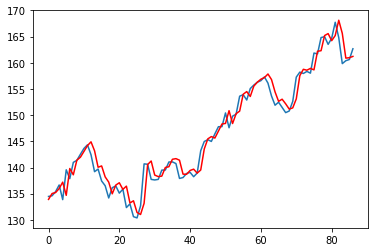

In [67]:
plt.plot(y_output)
plt.plot(yhat, color="red")
plt.show()